In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Task 0
Read the dataset from csv file & perform data cleaning - remove all rows, which contains `?` in some columns.
Also check for data correctness (salary & salary $K).

In [16]:
df = pd.read_csv("../data/adult.csv")
df.replace("?", pd.NA, inplace=True)

# Task 1
Print the count of men and women in the dataset.

In [17]:
df["sex"].value_counts()

sex
Male      21790
Female    10771
Name: count, dtype: int64

# Task 2
Find the average age of men in dataset

In [18]:
df[df["sex"] == "Male"]["age"].mean()

39.43354749885268

# Task 3
Get the percentage of people from Poland (native-country)

In [19]:
(df["native-country"] == "Poland").mean() * 100

0.18426952489174164

# Task 4
Get the mean and standard deviation of the age for people who earn > 50K per year. After this, get it for those who earn <= 50K.

In [20]:
print(df[df["salary K$"] > 50]["age"].std())
print(df[df["salary K$"] > 50]["age"].mean())

print(df[df["salary K$"] <= 50]["age"].std())
print(df[df["salary K$"] <= 50]["age"].mean())

10.519027719851826
44.24984058155847
14.02008849082488
36.78373786407767


# Task 5
Check, if there are some people without higher education (education: Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate), but with > 50K salary

In [21]:
higher_education = ["Bachelors", "Prof-school", "Assoc-acdm", "Assoc-voc", "Masters", "Doctorate"]
df[(df["salary K$"] > 50) & (~df["education"].isin(higher_education))]

,Unnamed: 0,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$
7,7,52,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,>50K,307
10,10,37,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,Black,Male,80,United-States,>50K,116
27,27,54,<NA>,Some-college,Married-civ-spouse,<NA>,Husband,Asian-Pac-Islander,Male,60,South,>50K,275
38,38,31,Private,Some-college,Married-civ-spouse,Sales,Husband,White,Male,38,<NA>,>50K,166
55,55,43,Private,Some-college,Married-civ-spouse,Tech-support,Husband,White,Male,40,United-States,>50K,341
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32510,32510,39,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,45,<NA>,>50K,212
32518,32518,57,Local-gov,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,40,United-States,>50K,116
32519,32519,46,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,48,United-States,>50K,239
32557,32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K,173


# Task 6
Get the statistics of age for each type of education. Use `groupby` and `describe` for this.

In [22]:
df.groupby("education")["age"].describe()

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
10th,933.0,37.429796,16.720713,17.0,22.00,34.0,52.0,90.0
11th,1175.0,32.355745,15.545485,17.0,18.00,28.0,43.0,90.0
12th,433.0,32.000000,14.334625,17.0,19.00,28.0,41.0,79.0
1st-4th,168.0,46.142857,15.615625,19.0,33.00,46.0,57.0,90.0
5th-6th,333.0,42.885886,15.557285,17.0,29.00,42.0,54.0,84.0
7th-8th,646.0,48.445820,16.092350,17.0,34.25,50.0,61.0,90.0
9th,514.0,41.060311,15.946862,17.0,28.00,39.0,54.0,90.0
Assoc-acdm,1067.0,37.381443,11.095177,19.0,29.00,36.0,44.0,90.0
Assoc-voc,1382.0,38.553546,11.631300,19.0,30.00,37.0,46.0,84.0


# Task 7
Compare the married and non-married men salaries. Who earns more? (>50K or <=50K)
Married men are those, whom `marital-status` starts with "Married". Others are not.

In [23]:
print(df[(df["sex"] == "Male") & (df["marital-status"].str.startswith("Married"))].describe())
print(df[(df["sex"] == "Male") & (~df["marital-status"].str.startswith("Married"))].describe())

         Unnamed: 0           age  hours-per-week     salary K$
count  13541.000000  13541.000000    13541.000000  13541.000000
mean   16356.250055     43.666568       44.077838    106.356178
std     9419.441051     12.069749       11.676555    102.152510
min        1.000000     17.000000        1.000000     15.000000
25%     8227.000000     34.000000       40.000000     30.000000
50%    16367.000000     42.000000       40.000000     46.000000
75%    24533.000000     52.000000       50.000000    181.000000
max    32557.000000     90.000000       99.000000    349.000000
         Unnamed: 0          age  hours-per-week    salary K$
count   8249.000000  8249.000000     8249.000000  8249.000000
mean   16111.686871    32.484907       39.719966    45.977088
std     9400.562295    12.466660       12.345707    53.237762
min        0.000000    17.000000        1.000000    15.000000
25%     7987.000000    23.000000       38.000000    24.000000
50%    16108.000000    29.000000       40.000000    

# Task 8
Get the max hours per week some person works. How many people works the same amount of hours per week?

In [24]:
print(df["hours-per-week"].describe())
len(df[df["hours-per-week"] == df["hours-per-week"].max()])

count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64


85

# Task 9
Analyze the correlation between data in dataset. Understand connected fields in it and print highlight thier connection.

           salary K$       age
salary K$   1.000000  0.201774
age         0.201774  1.000000


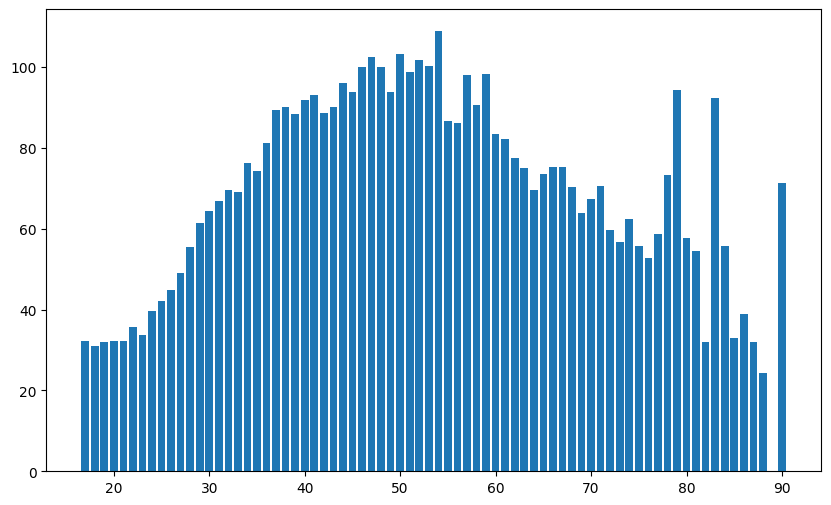

In [14]:
print(df[["salary K$", "age"]].corr())
df_clean = df.dropna(subset=["salary K$", "age"])
age_salary = df_clean.groupby("age")["salary K$"].mean()
plt.figure(figsize=(10, 6))
plt.bar(age_salary.index, age_salary)
plt.show()